In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test], ignore_index=True,sort = False)
print(train.shape,test.shape,data.shape)

(891, 13) (418, 12) (1309, 13)


In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [3]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
source            0
dtype: int64

In [4]:
# Finding Percentage of missing Data
miss_value_percent = 100*(data.isnull().sum()/len(data))
miss_value_percent

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
source          0.000000
dtype: float64

In [5]:
data.drop('Cabin', axis = 1, inplace = True)

In [8]:
data.replace(('male','female'),(1,0), inplace = True)

In [9]:
data.apply(lambda x: len(x.unique()))

PassengerId    1309
Survived          3
Pclass            3
Name           1307
Sex               2
Age              99
SibSp             7
Parch             8
Ticket          929
Fare            282
Embarked          4
source            2
dtype: int64

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,train
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,train


In [11]:
# Find Co-relation among the target variable(survived)
corelation = data.corr()['Survived'].sort_values()
corelation

Sex           -0.543351
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [12]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [13]:
data.drop(['Name','Ticket','Embarked'], axis = 1, inplace = True)

In [14]:
data['Fare'].fillna(data['Fare'].mean(), inplace = True)
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [15]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,source
0,1,0.0,3,1,22.0,1,0,7.2500,train
1,2,1.0,1,0,38.0,1,0,71.2833,train
2,3,1.0,3,0,26.0,0,0,7.9250,train
3,4,1.0,1,0,35.0,1,0,53.1000,train
4,5,0.0,3,1,35.0,0,0,8.0500,train


In [16]:
data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
source           0
dtype: int64

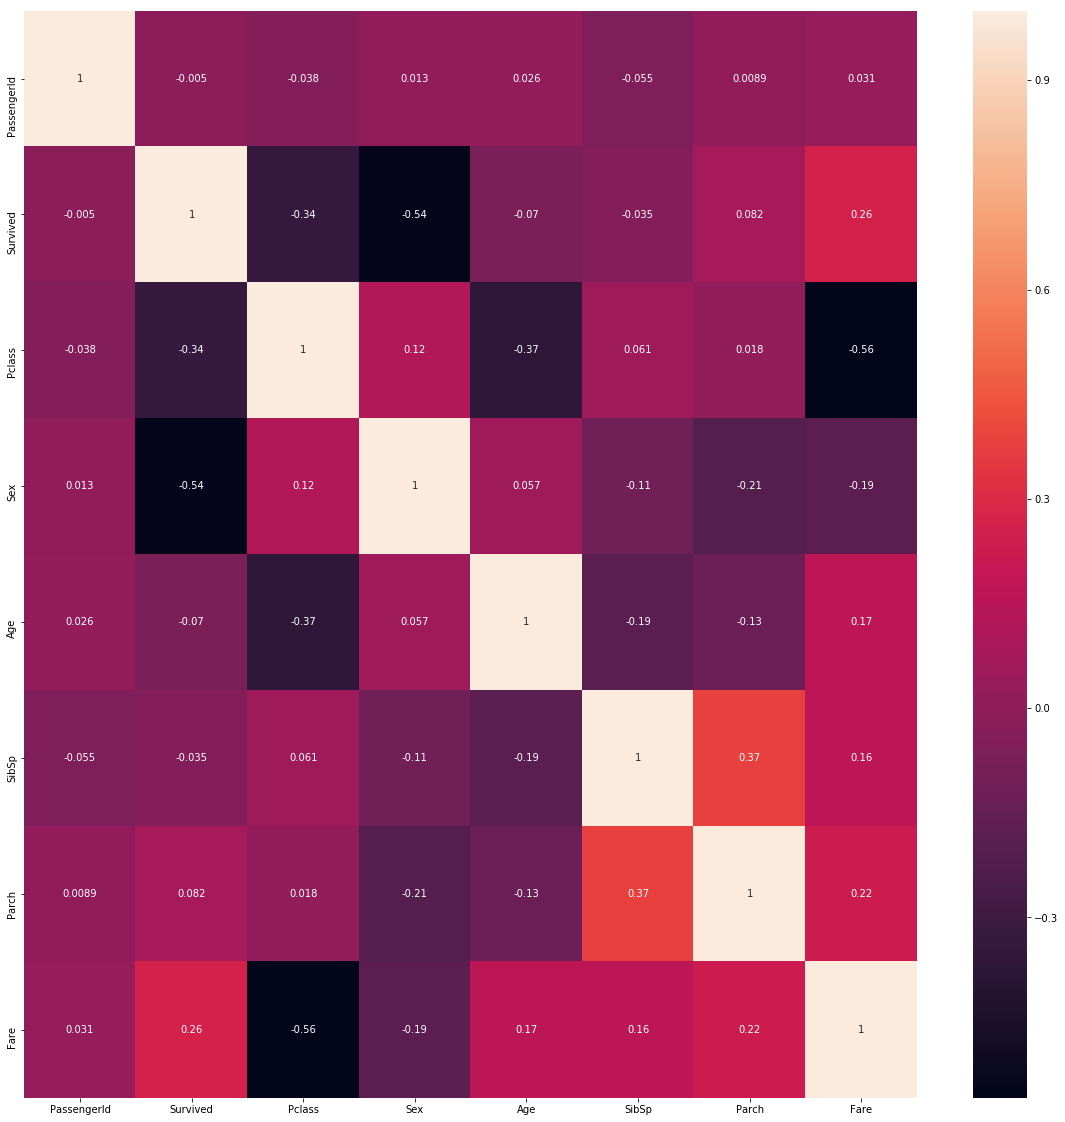

In [17]:
# Get co-relation of features of each features in dataset and plot diagram for heatmap
cormat = data.corr()
top_corr_features = cormat.index
plt.figure(figsize = (20,20))
# Plot Heatmap
sns.heatmap(data[top_corr_features].corr(),annot = True)

In [19]:
train = data.loc[data['source'] == "train"]
test = data.loc[data['source'] == "test"]

In [20]:
train.drop(['source'], axis = 1, inplace = True)
test.drop(['source'], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [21]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test = test.drop("Survived", axis = 1).copy()

# Feature Selection using various Techniques

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#Apply SelectKbest class to extract top 4 best features
bestfeatures = SelectKBest(score_func = chi2, k = 5)
fit = bestfeatures.fit(X_train,Y_train)

In [24]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
# Concat two Dataframe for better visualization
FeaturesScores = pd.concat([dfcolumns,dfscores],axis = 1)
FeaturesScores.columns = ['Specs','Scores'] # Naming the Dataframe columns
print(FeaturesScores.nlargest(5,'Scores')) # Print 5 best features scores

    Specs       Scores
6    Fare  4518.319091
2     Sex    92.702447
1  Pclass    30.873699
3     Age    25.023249
5   Parch    10.097499


[0.1694754  0.1022135  0.27854185 0.18299387 0.04277395 0.03654476
 0.18745666]


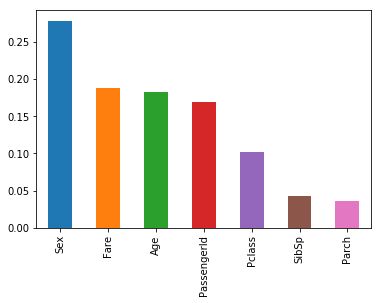

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
model =  ExtraTreesClassifier()
model.fit(X_train,Y_train)
print(model.feature_importances_) # use inbuilt class feature importances of tree based classifier
# plot grpah of feature importnaces for better visualization
feat_importances = pd.Series(model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(7).plot(kind = 'bar')
plt.show()

# Hyper Parameter Tuning using GridSearchCV and RandomizedSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time
max_depth =[45,70,95,130]
min_sample_leaf = [5,15,30,50]
param_grid = dict(max_depth = max_depth,min_samples_leaf = min_sample_leaf)
D_T = DecisionTreeClassifier()
grid = GridSearchCV(estimator = D_T,param_grid = param_grid,cv = 10)
start_time = time.time()
grid_results = grid.fit(X_train,Y_train)
print("Best: %f using %s" %(grid_results.best_score_,grid_results.best_params_))

Best: 0.811448 using {'max_depth': 95, 'min_samples_leaf': 15}


In [28]:
print("Execution Time:"+str((time.time()-start_time))+'ms')

Execution Time:158.31731963157654ms


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import random 
R_gid = {'n_estimators': list(range(15,200)),
         'n_jobs': list(range(5,100)),
          'max_depth': list(range(3,150))
         }
R_F = RandomForestClassifier()
RF_search = RandomizedSearchCV(estimator = R_F,param_distributions = R_gid,cv = 5)

In [31]:
start_time = time.time()
RF_result = RF_search.fit(X_train,Y_train)

In [33]:
print("Best: %f using %s" %(RF_result.best_score_,RF_result.best_params_))
print("Execution Time:"+str((time.time()-start_time))+'ms')

Best: 0.819304 using {'n_jobs': 62, 'n_estimators': 119, 'max_depth': 47}
Execution Time:298.06053471565247ms


In [35]:
from sklearn.model_selection import cross_val_score
R_Forest = RandomForestClassifier(n_jobs = 62,n_estimators = 119, max_depth = 47)
R_Forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=47, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=62,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
Forest = R_Forest.predict(X_test)
Forest_score = round(R_Forest.score(X_train,Y_train)*100,2)
Forest_score

100.0

In [38]:
R_Fore = cross_val_score(R_Forest,X_train,Y_train,cv = 10)

In [39]:
print(R_Fore)

[0.8        0.82222222 0.75280899 0.84269663 0.87640449 0.85393258
 0.79775281 0.80898876 0.84269663 0.82954545]


In [40]:
print(R_Fore.mean())

0.8227048575644081


In [41]:
D_T = DecisionTreeClassifier(max_depth = 95, min_samples_leaf = 15)
D_T.fit(X_train,Y_train)
D_T_Predict = D_T.predict(X_test)
D_T_score = round(D_T.score(X_train,Y_train)*100,2)
D_T_score

84.62

In [42]:
D_cross_score = cross_val_score(D_T,X_train,Y_train,cv=10)
print(D_cross_score)

[0.73333333 0.86666667 0.7752809  0.83146067 0.87640449 0.79775281
 0.79775281 0.82022472 0.83146067 0.78409091]


In [43]:
print(D_cross_score.mean())

0.8114427987742594
